In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [3]:
df2=pd.read_excel('birth.xlsx')

In [4]:
df2.shape

(189, 6)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mom_weight    189 non-null    int64  
 1   Mom_height    189 non-null    int64  
 2   Mom_Age       189 non-null    int64  
 3   Religion      189 non-null    int64  
 4   Gender        189 non-null    int64  
 5   Birth_Weight  189 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 9.0 KB


In [6]:
df2.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70
2,44,153,23,2,1,1.59
3,45,177,19,2,1,2.73
4,46,160,19,2,1,2.08


In [7]:
df2.isnull().sum() # Dataset contains no null Values.

Mom_weight      0
Mom_height      0
Mom_Age         0
Religion        0
Gender          0
Birth_Weight    0
dtype: int64

In [8]:
df2['Gender'].value_counts()

1    145
2     44
Name: Gender, dtype: int64

In [9]:
df2['Gender'].replace(2,df2['Gender'].mode()[0],inplace=True)

### As we know that birth can be only given by female.so we just replace the other values of Gender coloum with Mode of value of That Column.

In [10]:
df2['Gender'].value_counts()

1    189
Name: Gender, dtype: int64

In [11]:
df2.describe()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
count,189.000000,189.000000,189.000000,189.000000,189.0,189.000000
mean,65.089947,172.026455,23.238095,1.793651,1.0,2.936508
std,9.966826,8.978363,5.298678,0.808704,0.0,0.645921
min,41.000000,151.000000,14.000000,1.000000,1.0,1.500000
25%,59.000000,166.000000,19.000000,1.000000,1.0,2.440000
50%,69.000000,174.000000,23.000000,2.000000,1.0,2.980000
75%,73.000000,178.000000,26.000000,2.000000,1.0,3.440000
max,79.000000,189.000000,45.000000,3.000000,1.0,4.150000


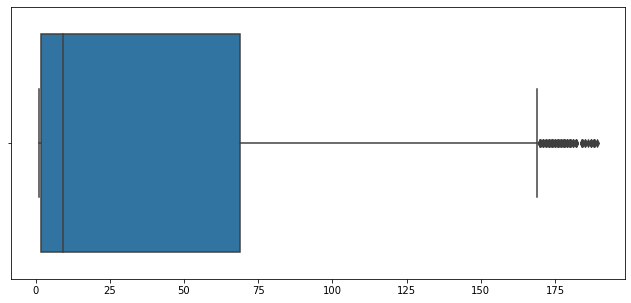

In [12]:
plt.figure(figsize=(11,5))
sns.boxplot(df2);

### From above Figure we can clearly see some Outliers. 

### Now,we are going to remove all Outliers. 

In [14]:
min_thresold, max_thresold = df2.Birth_Weight.quantile([0.001,0.999])
min_thresold, max_thresold

(1.51692, 4.142480000000001)

In [15]:
df2_birth_weight = df2[(df2.Birth_Weight<max_thresold) & (df2.Birth_Weight>min_thresold)]
df2_birth_weight.shape

(187, 6)

In [16]:
min_thresold, max_thresold = df2.Mom_Age.quantile([0.001,0.999])
min_thresold, max_thresold

(14.0, 43.308000000000106)

In [17]:
df2_Age = df2[(df2.Mom_Age<max_thresold) & (df2.Mom_Age>min_thresold)]
df2_Age.shape

(185, 6)

In [18]:
min_thresold, max_thresold = df2.Mom_weight.quantile([0.001,0.999])
min_thresold, max_thresold

(41.0, 79.0)

In [19]:
df2_final = df2[(df2.Mom_weight<max_thresold) & (df2.Mom_weight>min_thresold)]
df2_final.shape

(183, 6)

In [20]:
x = df2_final.describe()
print(x)

       Mom_weight  Mom_height     Mom_Age    Religion  Gender  Birth_Weight
count  183.000000  183.000000  183.000000  183.000000   183.0    183.000000
mean    65.464481  172.218579   23.349727    1.781421     1.0      2.947978
std      9.358994    8.764080    5.298568    0.802663     0.0      0.635389
min     42.000000  151.000000   14.000000    1.000000     1.0      1.500000
25%     59.500000  167.000000   19.000000    1.000000     1.0      2.460000
50%     69.000000  174.000000   23.000000    2.000000     1.0      2.980000
75%     73.000000  178.000000   26.500000    2.000000     1.0      3.430000
max     78.000000  189.000000   45.000000    3.000000     1.0      4.150000


In [21]:
x = df2_final.corr()
print(x)

              Mom_weight  Mom_height   Mom_Age  Religion  Gender  Birth_Weight
Mom_weight      1.000000    0.492319  0.109279  0.081611     NaN      0.789842
Mom_height      0.492319    1.000000  0.064132 -0.043159     NaN      0.623325
Mom_Age         0.109279    0.064132  1.000000 -0.000014     NaN      0.074469
Religion        0.081611   -0.043159 -0.000014  1.000000     NaN      0.144140
Gender               NaN         NaN       NaN       NaN     NaN           NaN
Birth_Weight    0.789842    0.623325  0.074469  0.144140     NaN      1.000000


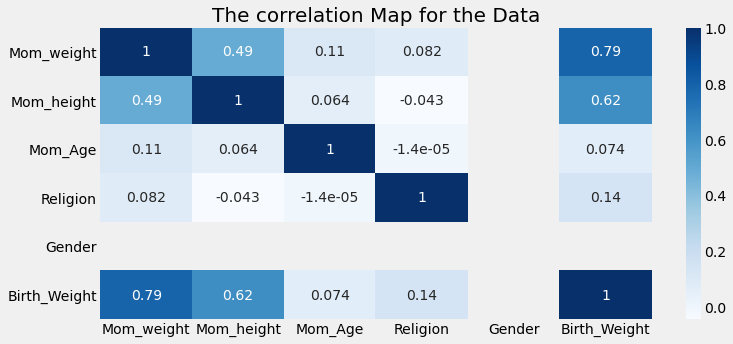

In [22]:
plt.rcParams['figure.figsize'] = (11, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(df2_final.corr(),
            cmap = 'Blues',
            annot = True)
plt.title('The correlation Map for the Data', fontsize = 20)
plt.show()

### Insight:- In upper heatmap, we clearly see a strong positive corelation b/w Mom_weight & Birth_weight.

In [23]:
x = df2_final.cov()
x.style.bar(color = 'gold', align = 'mid')

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
Mom_weight,87.590764,40.381433,5.419084,0.613073,0.000000,4.696878
Mom_height,40.381433,76.809103,2.978082,-0.303609,0.000000,3.471049
Mom_Age,5.419084,2.978082,28.074821,-0.000060,0.000000,0.250711
Religion,0.613073,-0.303609,-0.000060,0.644268,0.000000,0.073512
Gender,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Birth_Weight,4.696878,3.471049,0.250711,0.073512,0.000000,0.403720


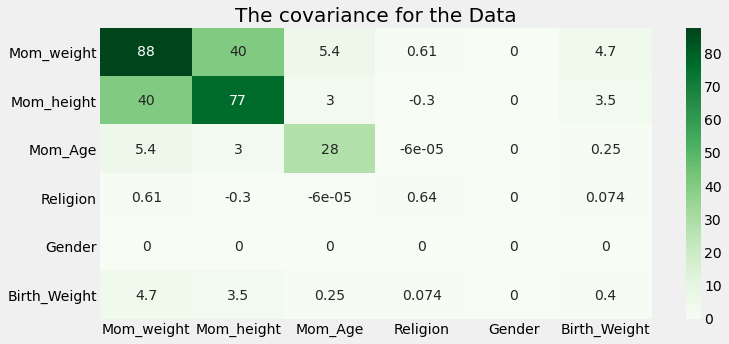

In [24]:
plt.rcParams['figure.figsize'] = (11, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(df2_final.cov(),
            cmap = 'Greens',
            annot = True)
plt.title('The covariance for the Data', fontsize = 20)
plt.show()

### insight:- from this heat map we can analyed the data and make a decision that the covariance between Mom Weight and Birth_weight is vary high and Somehow Covariance of Mom Height is Also Good with Birth_weight. so that we can say that all three Columns data move together in the dataset.

<Figure size 72x72 with 0 Axes>

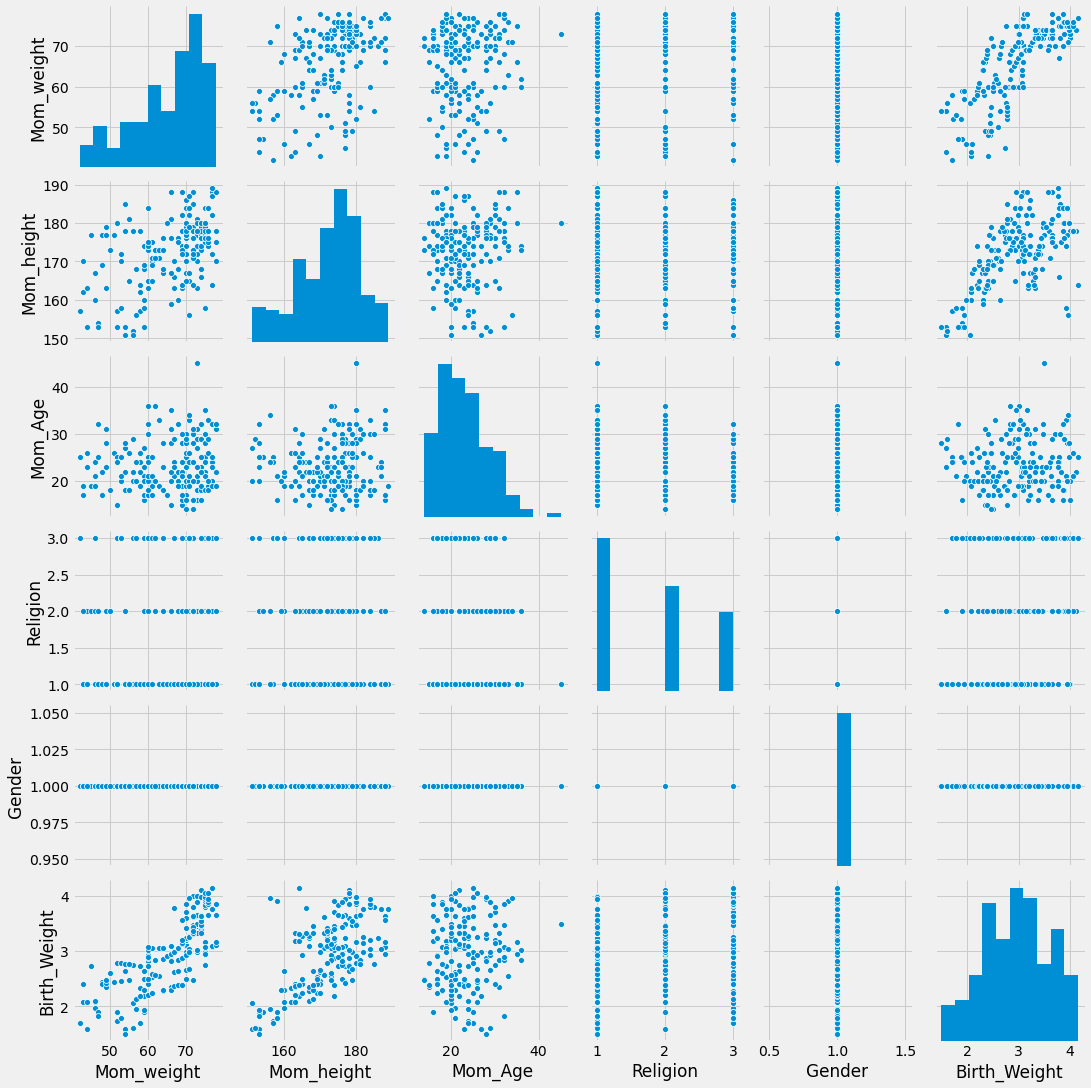

In [27]:
plt.figure(figsize=(1,1))
sns.pairplot(df2_final)
plt.show()

### Insight:- In above Pairplot we can clearly see the positive Linear relationship b/w Mom_weight & Mom_height with  Birth_weight. which means If Mom_weight and Mom_height increase Than Birth_weight will also Increase.

## Seprating the independent and dependent Variables from Dataset 

In [24]:
x = df2_final.drop(columns=['Birth_Weight'])

In [25]:
y = df2_final['Birth_Weight']

In [26]:
x.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender
1,42,157,25,3,1
2,44,153,23,2,1
3,45,177,19,2,1
4,46,160,19,2,1
5,46,167,24,1,1


In [27]:
y.head()

1    1.70
2    1.59
3    2.73
4    2.08
5    2.10
Name: Birth_Weight, dtype: float64

## Training and Testing of a Dataset 

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

In [106]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [107]:
y_pred = regressor.predict(x_test)

In [108]:
Accuracy_score = r2_score(y_pred,y_test)

In [109]:
Accuracy_score 

0.6877741270156041

### Insight:-Here, we can see that the Accuracy Score is not so good,it is beacuse we have a less no. of data in a dataset to train and test.But We will Try Another Algorithm like Random Forest Regressor. 

### Testing the Model 

In [33]:
baby_weight = [[41,147,24,2,1]]
print(regressor.predict(baby_weight))

[1.35831998]


### From the above evaluation of Linear Regression Model we can see by giving input values.The baby_weight is 1.35kg. 

# Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
RFreg = RandomForestRegressor(n_estimators=10,random_state=0)

## Training & Testing The Dataset 

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.32,random_state=0)

In [90]:
RFreg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [91]:
y_predict = RFreg.predict(x_test)

In [92]:
Accuracy_rand_reg = r2_score(y_test,y_predict)

In [93]:
Accuracy_rand_reg

0.8078925714177918

## Here,we can see that we are getting much good Accuracy by using Random Forest Regressor as Compare to  Linear Regression.  

In [94]:
baby_weight_new = [[41,147,24,2,1]]
print(RFreg.predict(baby_weight_new))

[1.634]


## From the above evaluation of Random Forest Regressor we can see by giving input values.The baby_weight_new is 1.63kg. 